## Time Series Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.font_manager as fm
matplotlib.rcParams['axes.unicode_minus'] = False

fm.get_fontconfig_fonts()
font_location = "c:/windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

#### Time Series Data Handling

In [21]:
# Pandas의 Timestamp
# Pandas는 날짜와 시간을 캡슐화한 단일 객체인 Timestamp를 지원
pd.Timestamp(year=2021, month=1, day=1, hour=5, minute=10, second=8, microsecond=99)

Timestamp('2021-01-01 05:10:08.000099')

In [24]:
pd.Timestamp('2021/1/10'), pd.Timestamp('2021-1/10'), pd.Timestamp('Jan 10, 2021 20:45.56')

(Timestamp('2021-01-10 00:00:00'),
 Timestamp('2021-01-10 00:00:00'),
 Timestamp('2021-01-10 20:45:33'))

In [25]:
# pd.to_datetime을 통해 dataframe의 columns을 timestamp로 변환할 수 있음
pd.to_datetime('2015-5-13'), pd.to_datetime('2015-13-5', dayfirst=True) #일을 먼저 적어주는 경우

(Timestamp('2015-05-13 00:00:00'), Timestamp('2015-05-13 00:00:00'))

In [26]:
crime = pd.read_csv("./data/crime.csv")
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


In [27]:
crime.dtypes # REPORTED_DATE가 Object로 되어 있음

OFFENSE_TYPE_ID         object
OFFENSE_CATEGORY_ID     object
REPORTED_DATE           object
GEO_LON                float64
GEO_LAT                float64
NEIGHBORHOOD_ID         object
IS_CRIME                 int64
IS_TRAFFIC               int64
dtype: object

In [28]:
crime.REPORTED_DATE[0]

'2014-06-29 02:01:00'

In [29]:
crime['REPORTED_DATE'] = pd.to_datetime(crime.REPORTED_DATE)

In [30]:
crime.dtypes, crime.REPORTED_DATE[0]

(OFFENSE_TYPE_ID                object
 OFFENSE_CATEGORY_ID            object
 REPORTED_DATE          datetime64[ns]
 GEO_LON                       float64
 GEO_LAT                       float64
 NEIGHBORHOOD_ID                object
 IS_CRIME                        int64
 IS_TRAFFIC                      int64
 dtype: object,
 Timestamp('2014-06-29 02:01:00'))

In [ ]:
# 시계열을 이용한 슬라이스
# Timestamp를 인덱스로 지정하여 효율적으로 데이터 슬라이싱

In [31]:
crime2 = crime.set_index('REPORTED_DATE')
crime2.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0


In [33]:
crime2.loc['2016-05-12 16:45:00']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-12 16:45:00,traffic-accident,traffic-accident,-104.847024,39.779596,montbello,0,1
2016-05-12 16:45:00,traffic-accident,traffic-accident,-105.049180,39.769296,west-highland,0,1
2016-05-12 16:45:00,fraud-identity-theft,white-collar-crime,-104.931971,39.717359,hilltop,1,0


In [34]:
crime2.loc['2016-05-12']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-12 23:51:00,criminal-mischief-other,public-disorder,-105.017241,39.705845,athmar-park,1,0
2016-05-12 18:40:00,liquor-possession,drug-alcohol,-104.995692,39.747875,cbd,1,0
2016-05-12 22:26:00,traffic-accident,traffic-accident,-104.880037,39.777037,stapleton,0,1
2016-05-12 20:35:00,theft-bicycle,larceny,-104.929350,39.763797,northeast-park-hill,1,0
2016-05-12 09:39:00,theft-of-motor-vehicle,auto-theft,-104.941233,39.775510,elyria-swansea,1,0
...,...,...,...,...,...,...,...
2016-05-12 17:55:00,public-peace-other,public-disorder,-105.027747,39.700029,westwood,1,0
2016-05-12 19:24:00,threats-to-injure,public-disorder,-104.947118,39.763777,clayton,1,0
2016-05-12 22:28:00,sex-aslt-rape,sexual-assault,NaN,NaN,harvey-park-south,1,0


In [35]:
crime2.loc['2016-05'].shape, crime2.loc['2016'].shape

((8012, 7), (91076, 7))

In [36]:
crime2.loc['Dec 2015'].sort_index()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-12-01 00:48:00,drug-cocaine-possess,drug-alcohol,-104.891681,39.740155,east-colfax,1,0
2015-12-01 00:48:00,theft-of-motor-vehicle,auto-theft,-104.891681,39.740155,east-colfax,1,0
2015-12-01 01:00:00,criminal-mischief-other,public-disorder,-104.993574,39.739773,civic-center,1,0
2015-12-01 01:10:00,traf-other,all-other-crimes,-104.995496,39.725618,baker,1,0
2015-12-01 01:10:00,traf-habitual-offender,all-other-crimes,-104.995496,39.725618,baker,1,0
...,...,...,...,...,...,...,...
2015-12-31 23:35:00,drug-cocaine-possess,drug-alcohol,-104.988019,39.753420,five-points,1,0
2015-12-31 23:40:00,traffic-accident,traffic-accident,-104.945076,39.736768,congress-park,0,1
2015-12-31 23:44:00,drug-cocaine-possess,drug-alcohol,-104.966814,39.746460,city-park-west,1,0


In [ ]:
# 시간 데이터로 열 필터링
# datetime 형식의 열을 사용하여 필터링 하는 경우, datetime index를 사용할 때와 같이 작동하지 않는 경우가 있음

In [37]:
crime[crime.REPORTED_DATE == '2016-05-12 16:45:00']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
300905,traffic-accident,traffic-accident,2016-05-12 16:45:00,-104.847024,39.779596,montbello,0,1
302354,traffic-accident,traffic-accident,2016-05-12 16:45:00,-105.049180,39.769296,west-highland,0,1
302373,fraud-identity-theft,white-collar-crime,2016-05-12 16:45:00,-104.931971,39.717359,hilltop,1,0


In [38]:
crime[crime.REPORTED_DATE == '2016-05-12'] # 열로 할 결우 이러한 방법은 작동하지 않음 하고싶으면 index로 지정해야함

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC


In [39]:
# .between은 부분 문자열을 지원하므로 슬라이싱 기능의 대부분을 활용할 수 있음
crime[crime.REPORTED_DATE.between('2016-05-12', '2016-05-13')].sort_values(by ='REPORTED_DATE')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
310555,public-order-crimes-other,all-other-crimes,2016-05-12 00:05:00,-104.987417,39.727275,civic-center,1,0
315074,curfew,public-disorder,2016-05-12 00:07:00,-104.987432,39.726668,lincoln-park,1,0
312836,traf-other,all-other-crimes,2016-05-12 00:13:00,-105.053191,39.719419,barnum-west,1,0
310538,police-false-information,all-other-crimes,2016-05-12 00:33:00,-104.965948,39.764498,cole,1,0
311301,traf-habitual-offender,all-other-crimes,2016-05-12 01:01:00,-104.902327,39.771602,stapleton,1,0
...,...,...,...,...,...,...,...,...
299407,traf-other,all-other-crimes,2016-05-12 23:50:00,-104.940571,39.764474,clayton,1,0
304599,violation-of-restraining-order,all-other-crimes,2016-05-12 23:51:00,-105.017241,39.705845,athmar-park,1,0
315139,criminal-trespassing,all-other-crimes,2016-05-12 23:51:00,-105.017241,39.705845,athmar-park,1,0
295715,criminal-mischief-other,public-disorder,2016-05-12 23:51:00,-105.017241,39.705845,athmar-park,1,0


### DatetimeIndex에서만 작동하는 메서드

In [40]:
# 날짜와 상관없이 시간 기준으로 행 선택
crime2.between_time('2:00', '5:00', include_end=False) # include_end : 5시를 포함 하나 안 하나

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
2014-06-29 04:22:00,violation-of-restraining-order,all-other-crimes,-104.972447,39.739449,cheesman-park,1,0
...,...,...,...,...,...,...,...
2017-08-25 04:41:00,theft-items-from-vehicle,theft-from-motor-vehicle,-104.880586,39.645164,hampden-south,1,0
2017-09-13 04:17:00,theft-of-motor-vehicle,auto-theft,-105.028694,39.708288,westwood,1,0
2017-09-13 02:21:00,assault-simple,other-crimes-against-persons,-104.925733,39.654184,university-hills,1,0


In [41]:
crime2.at_time('5:47')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2013-11-26 05:47:00,criminal-mischief-other,public-disorder,-104.991476,39.751536,cbd,1,0
2017-04-09 05:47:00,criminal-mischief-mtr-veh,public-disorder,-104.959394,39.678425,university,1,0
2017-02-19 05:47:00,criminal-mischief-other,public-disorder,-104.986767,39.741336,north-capitol-hill,1,0
2017-02-16 05:47:00,aggravated-assault,aggravated-assault,-104.934029,39.732320,hale,1,0
2017-02-12 05:47:00,police-interference,all-other-crimes,-104.976306,39.722644,speer,1,0
...,...,...,...,...,...,...,...
2013-09-10 05:47:00,traffic-accident,traffic-accident,-104.986311,39.708426,washington-park-west,0,1
2013-03-14 05:47:00,theft-other,larceny,-105.047861,39.727237,villa-park,1,0
2012-10-08 05:47:00,theft-items-from-vehicle,theft-from-motor-vehicle,-105.037308,39.768336,west-highland,1,0


In [42]:
# .first : 시간에 대해 첫 n 세그먼트를 선택할 수 있는 메서드
# 인덱스에서 정렬해야 사용 가능
# pd.offsets 모듈에 있는 DateOffset 객체로 표시
crime_sort = crime2.sort_index()
crime_sort.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0


In [43]:
pd.offsets.MonthBegin(6, normalize=True) # 6달 주기를 생성하는 offset

<6 * MonthBegins>

In [44]:
crime_sort.first(pd.offsets.MonthBegin(6, normalize=True))
# 첫 6달 True 하면 날짜의 시간을 0으로하여 날짜만을 고려하여 계산

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-06-30 23:40:00,traffic-accident-hit-and-run,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:40:00,traffic-accident-dui-duid,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:44:00,traffic-accident,traffic-accident,-104.987578,39.711158,baker,0,1


In [45]:
crime_sort.first(pd.offsets.MonthBegin(6, normalize=False))
# normalize= False하면 날짜의 시간을 고려하여 계산

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-06-30 23:40:00,traffic-accident-dui-duid,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:44:00,traffic-accident,traffic-accident,-104.987578,39.711158,baker,0,1
2012-06-30 23:50:00,criminal-mischief-mtr-veh,public-disorder,-104.838271,39.788683,montbello,1,0


In [46]:
crime_sort.first('6MS') # 위의 normalize = False와 동일

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-06-30 23:40:00,traffic-accident-dui-duid,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:44:00,traffic-accident,traffic-accident,-104.987578,39.711158,baker,0,1
2012-06-30 23:50:00,criminal-mischief-mtr-veh,public-disorder,-104.838271,39.788683,montbello,1,0


In [47]:
crime_sort.first('5D') # 5 days

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-01-06 23:11:00,theft-items-from-vehicle,theft-from-motor-vehicle,-104.999752,39.726081,lincoln-park,1,0
2012-01-06 23:23:00,violation-of-restraining-order,all-other-crimes,-104.969588,39.681135,university,1,0
2012-01-06 23:30:00,assault-dv,other-crimes-against-persons,-104.958983,39.674135,university-park,1,0


In [48]:
crime_sort.first('5B') # 5 business days # 주말을 빼고

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-01-05 22:27:00,criminal-mischief-graffiti,public-disorder,-104.981969,39.739094,capitol-hill,1,0
2012-01-05 22:32:00,traffic-accident-hit-and-run,traffic-accident,-104.969107,39.733848,cheesman-park,0,1
2012-01-05 23:40:00,harassment,public-disorder,-104.962264,39.681313,university,1,0


In [49]:
crime_sort.first('7W') # 7 weeks, with weeks ending on Sunday

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-02-18 21:57:00,traffic-accident,traffic-accident,-104.974663,39.744041,north-capitol-hill,0,1
2012-02-18 22:19:00,criminal-mischief-graffiti,public-disorder,-104.957558,39.766129,clayton,1,0
2012-02-18 22:20:00,traffic-accident-dui-duid,traffic-accident,-104.919946,39.761917,north-park-hill,0,1


In [50]:
crime_sort.first('3QS') # 3rd quarter start

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-09-30 23:17:00,drug-hallucinogen-possess,drug-alcohol,-105.022715,39.678579,college-view-south-platte,1,0
2012-09-30 23:29:00,robbery-street,robbery,-104.977522,39.781310,globeville,1,0
2012-09-30 23:29:00,theft-of-motor-vehicle,auto-theft,-104.988838,39.686925,overland,1,0


In [51]:
crime_sort.first('A') # one year end

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-12-30 23:13:00,traffic-accident,traffic-accident,-104.973097,39.740032,capitol-hill,0,1
2012-12-30 23:14:00,burglary-residence-no-force,burglary,-104.960898,39.697153,washington-park,1,0
2012-12-30 23:39:00,theft-of-motor-vehicle,auto-theft,-105.002180,39.769714,sunnyside,1,0


In [52]:
# 주간 범죄수의 계산
# .resample : 가능한 시간 범위별로 그룹화 (Groupby와 유사)
weekly_crimes = crime_sort.resample('W').size() # 주별 요약: 일요일-토요일
weekly_crimes

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
              ... 
2017-09-03    1956
2017-09-10    1733
2017-09-17    1976
2017-09-24    1839
2017-10-01    1059
Freq: W-SUN, Length: 300, dtype: int64

In [53]:
crime_sort.resample('W-THU').size() # 주별 요약: 목요일-수요일

REPORTED_DATE
2012-01-05     462
2012-01-12    1116
2012-01-19     924
2012-01-26    1061
2012-02-02     926
              ... 
2017-09-07    1803
2017-09-14    1866
2017-09-21    1926
2017-09-28    1720
2017-10-05      28
Freq: W-THU, Length: 301, dtype: int64

In [54]:
# .resample에서 사용할 수 있는 모든 속성과 메서드
r = crime_sort.resample('W')
[attr for attr in dir(r) if attr[0].islower()]

['agg',
 'aggregate',
 'apply',
 'asfreq',
 'ax',
 'backfill',
 'bfill',
 'binner',
 'count',
 'ffill',
 'fillna',
 'first',
 'get_group',
 'groupby',
 'groups',
 'indices',
 'interpolate',
 'kind',
 'last',
 'max',
 'mean',
 'median',
 'min',
 'ndim',
 'nearest',
 'ngroups',
 'nunique',
 'ohlc',
 'pad',
 'pipe',
 'plot',
 'prod',
 'quantile',
 'sem',
 'size',
 'std',
 'sum',
 'transform',
 'var']

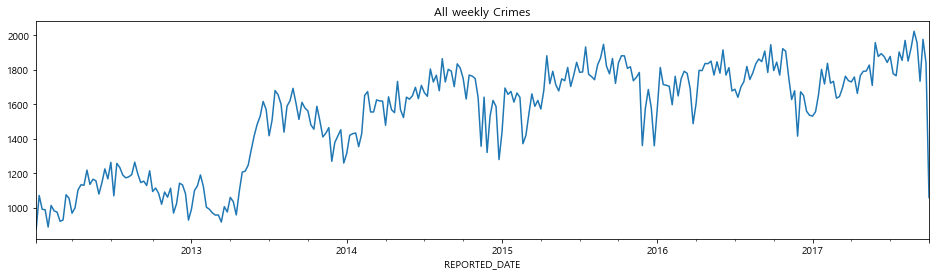

In [55]:
fig, ax = plt.subplots(figsize=(16, 4))
weekly_crimes.plot(title='All weekly Crimes', ax=ax)
plt.show()

In [56]:
# 분기별 범죄와 교통사고를 별도로 집계
quarterly_crime = crime2.resample('Q')['IS_CRIME', 'IS_TRAFFIC'].sum()
quarterly_crime.head()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,7882,4726
2012-06-30,9641,5255
2012-09-30,10566,5003
2012-12-31,9197,4802
2013-03-31,8730,4442


In [57]:
crime2.loc['2012-04-01':'2012-06-30', ['IS_CRIME', 'IS_TRAFFIC']].sum()

c:\Users\lucky\anaconda3\lib\site-packages\pandas\core\indexing.py:1109: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return self._getitem_tuple_same_dim(tup)


IS_CRIME      9641
IS_TRAFFIC    5255
dtype: int64

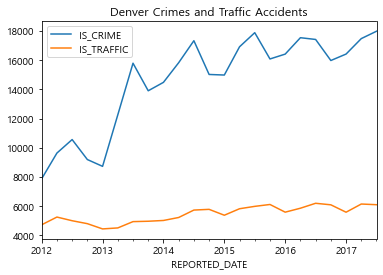

In [58]:
quarterly_crime.plot(title = 'Denver Crimes and Traffic Accidents')
plt.show()

In [59]:
# 백분율 증가 그래프
crime_begin = quarterly_crime.iloc[0]
crime_begin

IS_CRIME      7882
IS_TRAFFIC    4726
Name: 2012-03-31 00:00:00, dtype: int64

In [60]:
quarterly_crime.div(crime_begin).sub(1).round(2).mul(100)

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,0.0,0.0
2012-06-30,22.0,11.0
2012-09-30,34.0,6.0
2012-12-31,17.0,2.0
2013-03-31,11.0,-6.0
2013-06-30,56.0,-5.0
2013-09-30,100.0,5.0
2013-12-31,76.0,5.0
2014-03-31,84.0,6.0


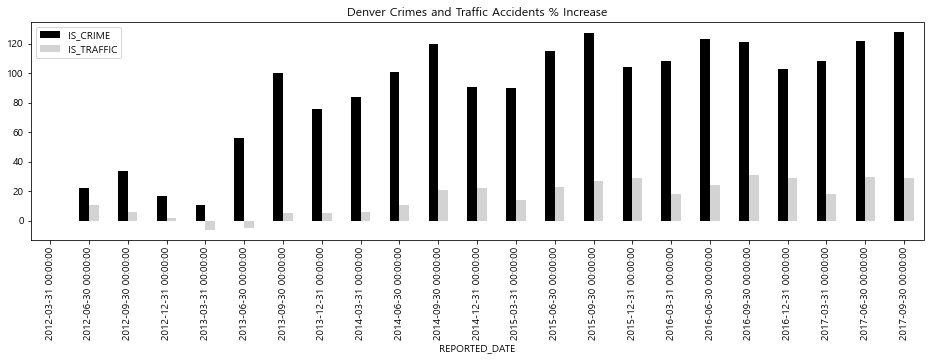

In [61]:
fig, ax = plt.subplots(figsize=(16, 4))
(quarterly_crime.div(crime_begin).sub(1).round(2).mul(100)
    .plot.bar(color=['black', 'lightgrey'], ax=ax,
          title='Denver Crimes and Traffic Accidents % Increase')
)
plt.show()

In [62]:
# 요일별, 연도별 범죄 측정
# .dt 속성을 사용해 범죄발생 요일과 연도를 추출할 수 있음
crime.REPORTED_DATE.dt.dayofweek #0:월 ... 6:일

0         6
1         6
2         6
3         6
4         6
         ..
460906    2
460907    1
460908    1
460909    1
460910    1
Name: REPORTED_DATE, Length: 460911, dtype: int64

In [63]:
crime.REPORTED_DATE.dt.day_name()

0            Sunday
1            Sunday
2            Sunday
3            Sunday
4            Sunday
            ...    
460906    Wednesday
460907      Tuesday
460908      Tuesday
460909      Tuesday
460910      Tuesday
Name: REPORTED_DATE, Length: 460911, dtype: object

In [64]:
crime.REPORTED_DATE.dt.year

0         2014
1         2014
2         2014
3         2014
4         2014
          ... 
460906    2017
460907    2017
460908    2017
460909    2017
460910    2017
Name: REPORTED_DATE, Length: 460911, dtype: int64

In [65]:
(crime
   ['REPORTED_DATE']
   .dt.day_name()
   .value_counts(sort=False))

Sunday       55213
Monday       70024
Thursday     69287
Tuesday      68394
Wednesday    69538
Friday       69621
Saturday     58834
Name: REPORTED_DATE, dtype: int64

In [66]:
(crime
   ['REPORTED_DATE']
   .dt.dayofweek
.value_counts(sort=False))

6    55213
0    70024
3    69287
1    68394
2    69538
4    69621
5    58834
Name: REPORTED_DATE, dtype: int64

In [67]:
crime_week = (crime
   ['REPORTED_DATE']
   .dt.dayofweek
.value_counts(sort=False))

In [68]:
crime_week.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
        'Friday', 'Saturday', 'Sunday']

In [69]:
crime_week

Monday       55213
Tuesday      70024
Wednesday    69287
Thursday     68394
Friday       69538
Saturday     69621
Sunday       58834
Name: REPORTED_DATE, dtype: int64

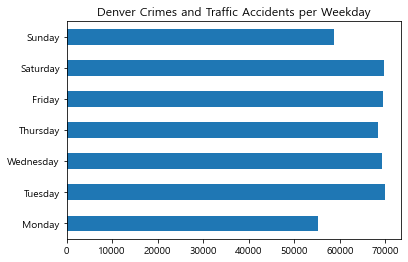

In [70]:
title = 'Denver Crimes and Traffic Accidents per Weekday'
fig, ax = plt.subplots(figsize=(6, 4))
crime_week.plot.barh(title=title, ax=ax)
plt.show()

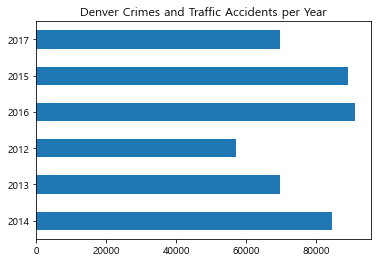

In [71]:
(crime.REPORTED_DATE.dt.year.value_counts(sort=False)
.plot.barh(title = 'Denver Crimes and Traffic Accidents per Year'))
plt.show()

In [72]:
crime.groupby([crime.REPORTED_DATE.dt.year.rename('year'),
              crime.REPORTED_DATE.dt.dayofweek.rename('day')]).size()

year  day
2012  0       8786
      1       8191
      2       8440
      3       8440
      4       8549
      5       7442
      6       7189
2013  0      10627
      1      10416
      2      10354
      3      10431
      4      10380
      5       8875
      6       8444
2014  0      12813
      1      12440
      2      12948
      3      12309
      4      12683
      5      10950
      6      10278
2015  0      13452
      1      13381
      2      13320
      3      13512
      4      13273
      5      11586
      6      10624
2016  0      13708
      1      13338
      2      13900
      3      14050
      4      14059
      5      11467
      6      10554
2017  0      10638
      1      10628
      2      10576
      3      10545
      4      10677
      5       8514
      6       8124
dtype: int64

In [73]:
(crime.groupby([crime.REPORTED_DATE.dt.year.rename('year'),
              crime.REPORTED_DATE.dt.dayofweek.rename('day')]).size()
.unstack('day'))

day,0,1,2,3,4,5,6
year,,,,,,,
2012,8786,8191,8440,8440,8549,7442,7189
2013,10627,10416,10354,10431,10380,8875,8444
2014,12813,12440,12948,12309,12683,10950,10278
2015,13452,13381,13320,13512,13273,11586,10624
2016,13708,13338,13900,14050,14059,11467,10554
2017,10638,10628,10576,10545,10677,8514,8124


네이선 핫도그 먹기 대회 Data
- 매년 미국의 독립기념일인 7월 4이 열리는 대회로 15분 동안 가장 많은 핫도그와 빵을 먹는 사람이 우승을 차지함
- 1980년부터 우승자가 먹은 핫도그의 개수를 기록
- 2001년 다케루 고바야시가 등장하면서 종전 기록의 두 배가 넘는 기록을 경신하였음

#### Bar Plot

In [3]:
hotdogs = pd.read_csv("http://datasets.flowingdata.com/hot-dog-contest-winners.csv")
hotdogs.head()

,Year,Winner,Dogs eaten,Country,New record
0,1980,Paul Siederman & Joe Baldini,9.1,United States,0
1,1981,Thomas DeBerry,11.0,United States,0
2,1982,Steven Abrams,11.0,United States,0
3,1983,Luis Llamas,19.5,Mexico,0
4,1984,Birgit Felden,9.5,Germany,0


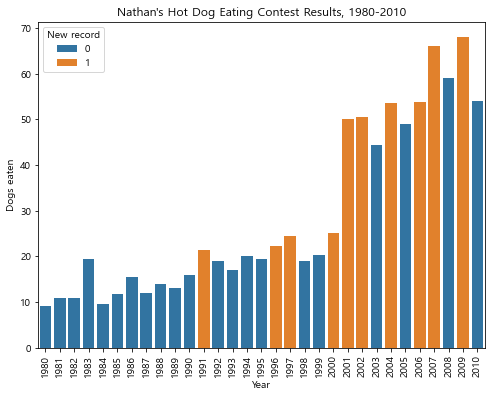

In [4]:
# 신기록 경신 여부
plt.figure(figsize=(8,6))
sns.barplot(data = hotdogs, x = 'Year', y = 'Dogs eaten', hue = 'New record', dodge=False) # dodge를 통해 간격을 조절, dodge=True, 옆으로 넓혀짐
plt.xticks(rotation = 90)
plt.title('Nathan\'s Hot Dog Eating Contest Results, 1980-2010')
plt.show()

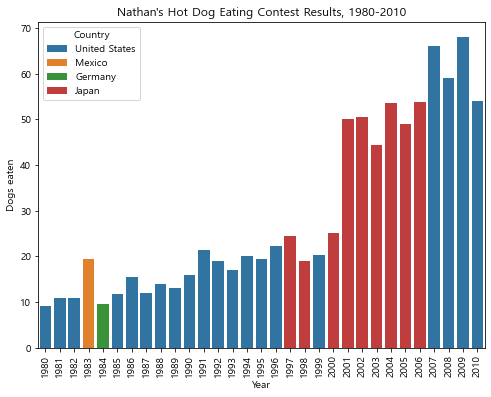

In [5]:
# 우승자 출신 국가
plt.figure(figsize=(8,6))
sns.barplot(data = hotdogs, x = 'Year', y = 'Dogs eaten', hue = 'Country', dodge=False) # dodge를 통해 간격을 조절, dodge=True, 옆으로 넓혀짐
plt.xticks(rotation = 90)
plt.title('Nathan\'s Hot Dog Eating Contest Results, 1980-2010')
plt.show()

#### Stacked bar plot

In [8]:
hotdog_places = pd.read_csv("http://datasets.flowingdata.com/hot-dog-places.csv")
hotdog_places # 1,2,3등이 먹은 기록

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,25,50.0,50.5,44.5,53.5,49,54,66,59,68.0,54
1,24,31.0,26.0,30.5,38.0,37,52,63,59,64.5,43
2,22,23.5,25.5,29.5,32.0,32,37,49,42,55.0,37


In [9]:
hotdog_places.T

,0,1,2
2000,25.0,24.0,22.0
2001,50.0,31.0,23.5
2002,50.5,26.0,25.5
2003,44.5,30.5,29.5
2004,53.5,38.0,32.0
2005,49.0,37.0,32.0
2006,54.0,52.0,37.0
2007,66.0,63.0,49.0
2008,59.0,59.0,42.0
2009,68.0,64.5,55.0


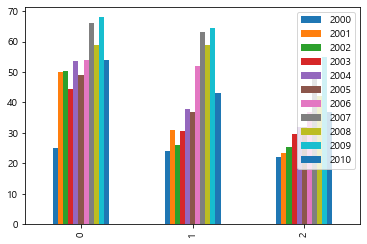

In [10]:
hotdog_places.plot.bar()
plt.show() # 하나의 행이 그룹으로 묶임 열 각각을 변수로 여김, 우리가 원하는거 아님 = 데이터 프레임 전치 필요

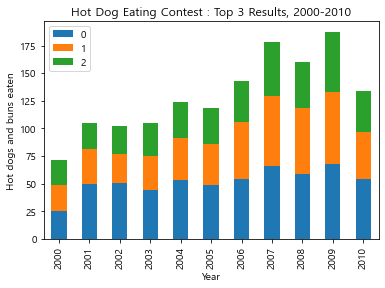

In [11]:
hotdog_places.T.plot.bar(stacked=True)
plt.title('Hot Dog Eating Contest : Top 3 Results, 2000-2010')
plt.xlabel('Year')
plt.ylabel('Hot dogs and buns eaten')
plt.show()

#### Line Plot

In [13]:
# 선 그래프는 연속형 시계열 데이터 시각화에 사용
# x 축 : 시간축, x축의 길이가 경향성 표현에 영향
# y 축 : 0에서 시작
population = pd.read_csv("http://datasets.flowingdata.com/world-population.csv")
population.head()

,Year,Population
0,1960,3028654024
1,1961,3068356747
2,1962,3121963107
3,1963,3187471383
4,1964,3253112403


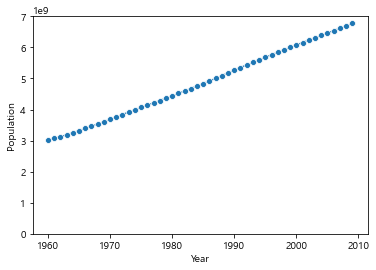

In [14]:
sns.lineplot(data = population, x = 'Year', y ='Population', marker ='o')
plt.ylim(0,7e9)
plt.show()

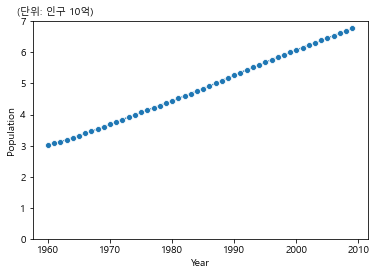

In [15]:
sns.lineplot(x = population['Year'], y =population['Population']/1e9, marker ='o') # 단위가 10억으로 해석가능
plt.ylim(0,7)
plt.text(1955, 7.2 ,'(단위: 인구 10억)' ) #x,y 좌표 , 텍스트
plt.show()

#### 계단식 그래프

In [17]:
# 시간에 따른 변화가 일정한 구간에서 일어나지 않는 경우, 연속형으로 그리기 힘듦 (예: 미국 우편요금)
postage = pd.read_csv("http://datasets.flowingdata.com/us-postage.csv")
postage.head()

,Year,Price
0,1991,0.29
1,1995,0.32
2,1999,0.33
3,2001,0.34
4,2002,0.37


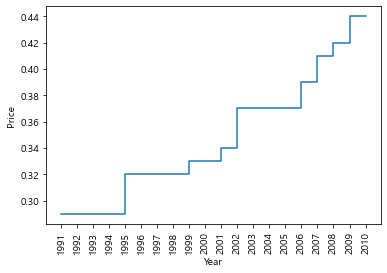

In [18]:
# step-pre는 계단이 앞에서부터 올라가고, step-post는 쭉 가다가 다음 데이터가 보이면 올라감
sns.lineplot(x = 'Year', y= 'Price', data = postage, drawstyle = 'steps-post') # 계단식 그래프
plt.xticks(np.arange(1991,2011), rotation = 90)
plt.show()

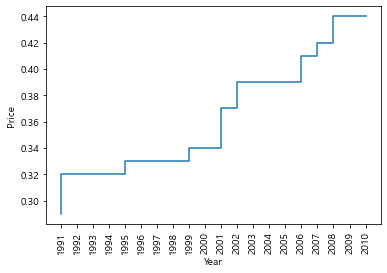

In [19]:
sns.lineplot(x = 'Year', y= 'Price', data = postage, drawstyle = 'steps-pre') # 계단식 그래프
plt.xticks(np.arange(1991,2011), rotation = 90)
plt.show()